<a href="https://colab.research.google.com/github/gigigilt/first/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%86%A4_C2_DAY2_HJ_%EB%A6%AC%EB%B7%B0%EC%A0%90%EC%88%98_%EA%B2%B0%EC%B8%A1%EC%B9%98_%EB%B3%B4%EC%A1%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 50)
df1=pd.read_csv('/content/olist_customers_dataset.csv')
df2=pd.read_csv('/content/olist_geolocation_dataset.csv')
df3=pd.read_csv('/content/olist_order_items_dataset.csv')
df4=pd.read_csv('/content/olist_order_payments_dataset.csv')
df5=pd.read_csv('/content/olist_order_reviews_dataset.csv')
df6=pd.read_csv('/content/olist_orders_dataset.csv')
df7=pd.read_csv('/content/olist_products_dataset.csv')
df8=pd.read_csv('/content/olist_sellers_dataset.csv')
df9=pd.read_csv('/content/product_category_name_translation.csv')


In [3]:
# 1. orders + customers (on 'customer_id')
df = pd.merge(df6, df1, on='customer_id', how='left')

# 2. order_items + products (on 'product_id')
df= pd.merge(df,df3, on='order_id', how='left')
df = pd.merge(df,df7, on='product_id', how='left')

# 3. merged + sellers (on 'seller_id')
df= pd.merge(df,df8, on='seller_id', how='left')

# 4. merged + order_payments (on 'order_id')
df = pd.merge(df,df4, on='order_id', how='left')

# 5. merged + order_reviews (on 'order_id')
df = pd.merge(df,df5, on='order_id', how='left')

# 6. merged + cat_translation (on 'product_category_name')
df= pd.merge(df,df9,on='product_category_name',how='left')

In [4]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto


In [5]:
df.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,177
order_delivered_carrier_date,2086
order_delivered_customer_date,3421
order_estimated_delivery_date,0
customer_unique_id,0
customer_zip_code_prefix,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   customer_unique_id             119143 non-null  object 
 9   customer_zip_code_prefix       119143 non-null  int64  
 10  customer_city                  119143 non-null  object 
 11  customer_state                 119143 non-null  object 
 12  order_item_id                 

In [7]:
df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
count,119143,119143,119143,119143,118966,117057,115722,119143,119143,119143.000000,119143,119143,118310.000000,118310,118310,118310,118310.000000,118310.000000,116601,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118310,118310,119140.000000,119140,119140.000000,119140.000000,118146,118146.000000,13989,50245,118146,118146,116576
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611,23,NaN,5,NaN,NaN,98410,NaN,4527,36159,636,98248,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,bed_bath_table
freq,63,63,115723,63,63,63,63,663,75,NaN,18875,50265,NaN,536,2155,63,NaN,NaN,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29293,84377,NaN,87776,NaN,NaN,63,NaN,494,259,547,63,11988
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35033.451298,NaN,NaN,1.196543,NaN,NaN,NaN,120.646603,20.032387,NaN,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,NaN,NaN,1.094737,NaN,2.941246,172.735135,NaN,4.015582,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29823.198969,NaN,NaN,0.699489,NaN,NaN,NaN,184.109691,15.836850,NaN,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,NaN,NaN,0.730141,NaN,2.777848,267.776077,NaN,1.400436,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11250.000000,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,NaN,NaN,1.000000,NaN,1.000000,60.850000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24240.000000,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,NaN,NaN,1.000000,NaN,2.000000,108.160000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58475.000000,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,NaN,NaN,1.000000,NaN,4.000000,189.240000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


In [8]:
df1=df.copy()
df2=df1.copy()
column_rename_map = { # olist_order_items_dataset (주문 항목 정보)
    'order_id': '주문 ID',
    'order_item_id': '주문 내 항목 순번',
    'product_id': '상품 ID',
    'seller_id': '판매자 ID',
    'shipping_limit_date': '배송 마감 기한',
    'price': '상품 가격',
    'freight_value': '배송비',

    # olist_order_payments_dataset (결제 정보)
    'payment_sequential': '결제 순번',
    'payment_type': '결제 방식',
    'payment_installments': '할부 개월 수',
    'payment_value': '결제 금액',

    # olist_order_reviews_dataset (리뷰 정보)
    'review_id': '리뷰 ID',
    'review_score': '리뷰 점수',
    'review_comment_title': '리뷰 제목',
    'review_comment_message': '리뷰 내용',
    'review_creation_date': '리뷰 작성일',
    'review_answer_timestamp': '리뷰 응답 시각',

    # olist_orders_dataset (주문 기본 정보)
    'customer_id': '고객 ID',
    'order_status': '주문 상태',
    'order_purchase_timestamp': '주문 시간',
    'order_approved_at': '결제 승인 시각',
    'order_delivered_carrier_date': '택배사 배송 시작일',
    'order_delivered_customer_date': '고객 수령일 (실제 배송일)',
    'order_estimated_delivery_date': '예상 배송일',

    # olist_customers_dataset (고객 정보)
    'customer_unique_id': '고유 고객 ID',
    'customer_zip_code_prefix': '우편번호 앞자리',
    'customer_city': '고객 도시',
    'customer_state': '고객 주(State)',

    # olist_geolocation_dataset (지역 정보)
    'geolocation_zip_code_prefix': '우편번호 앞자리',
    'geolocation_lat': '위도',
    'geolocation_lng': '경도',
    'geolocation_city': '도시명',
    'geolocation_state': '주(State) 코드',

    # olist_products_dataset (제품 정보)
    'product_category_name': '제품카테고리명',
    'product_name_lenght': '제품명 길이',
    'product_description_lenght': '제품 설명 길이',
    'product_photos_qty': '제품 사진 퀄리티',
    'product_weight_g': '제품 무게',
    'product_length_cm': '제품 길이',
    'product_height_cm': '제품 높이',
    'product_width_cm': '제품 너비',

    # olist_sellers_dataset (판매자 정보)
    'seller_zip_code_prefix': '판매자 우편번호',
    'seller_city': '판매자 도시',
    'seller_state': '판매자 주',

    # olist_category_dataset (카테고리 번역)
    'product_category_name_english': '제품 카테고리명 영어' }


df1_renamed = df2.rename(columns = column_rename_map)
df1_renamed

,주문 ID,고객 ID,주문 상태,주문 시간,결제 승인 시각,택배사 배송 시작일,고객 수령일 (실제 배송일),예상 배송일,고유 고객 ID,우편번호 앞자리,고객 도시,고객 주(State),주문 내 항목 순번,상품 ID,판매자 ID,배송 마감 기한,상품 가격,배송비,제품카테고리명,제품명 길이,제품 설명 길이,제품 사진 퀄리티,제품 무게,제품 길이,제품 높이,제품 너비,판매자 우편번호,판매자 도시,판매자 주,결제 순번,결제 방식,할부 개월 수,결제 금액,리뷰 ID,리뷰 점수,리뷰 제목,리뷰 내용,리뷰 작성일,리뷰 응답 시각,제품 카테고리명 영어
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,17602.0,tupa,SP,1.0,credit_card,3.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,baby
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80

In [9]:
corr=df.corr(numeric_only=True)

In [10]:
df1_renamed.describe(include='all')

,주문 ID,고객 ID,주문 상태,주문 시간,결제 승인 시각,택배사 배송 시작일,고객 수령일 (실제 배송일),예상 배송일,고유 고객 ID,우편번호 앞자리,고객 도시,고객 주(State),주문 내 항목 순번,상품 ID,판매자 ID,배송 마감 기한,상품 가격,배송비,제품카테고리명,제품명 길이,제품 설명 길이,제품 사진 퀄리티,제품 무게,제품 길이,제품 높이,제품 너비,판매자 우편번호,판매자 도시,판매자 주,결제 순번,결제 방식,할부 개월 수,결제 금액,리뷰 ID,리뷰 점수,리뷰 제목,리뷰 내용,리뷰 작성일,리뷰 응답 시각,제품 카테고리명 영어
count,119143,119143,119143,119143,118966,117057,115722,119143,119143,119143.000000,119143,119143,118310.000000,118310,118310,118310,118310.000000,118310.000000,116601,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118310,118310,119140.000000,119140,119140.000000,119140.000000,118146,118146.000000,13989,50245,118146,118146,116576
unique,99441,99441,8,98875,90733,81018,95664,459,96096,NaN,4119,27,NaN,32951,3095,93318,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,611,23,NaN,5,NaN,NaN,98410,NaN,4527,36159,636,98248,71
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-12-20 00:00:00,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,2017-08-14 20:43:31,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sao paulo,SP,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-08-17 22:17:55,bed_bath_table
freq,63,63,115723,63,63,63,63,663,75,NaN,18875,50265,NaN,536,2155,63,NaN,NaN,11988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29293,84377,NaN,87776,NaN,NaN,63,NaN,494,259,547,63,11988
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35033.451298,NaN,NaN,1.196543,NaN,NaN,NaN,120.646603,20.032387,NaN,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,NaN,NaN,1.094737,NaN,2.941246,172.735135,NaN,4.015582,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29823.198969,NaN,NaN,0.699489,NaN,NaN,NaN,184.109691,15.836850,NaN,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,NaN,NaN,0.730141,NaN,2.777848,267.776077,NaN,1.400436,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1003.000000,NaN,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11250.000000,NaN,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,NaN,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,NaN,NaN,1.000000,NaN,1.000000,60.850000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24240.000000,NaN,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,NaN,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,NaN,NaN,1.000000,NaN,2.000000,108.160000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58475.000000,NaN,NaN,1.000000,NaN,NaN,NaN,134.900000,21.180000,NaN,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,NaN,NaN,1.000000,NaN,4.000000,189.240000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN


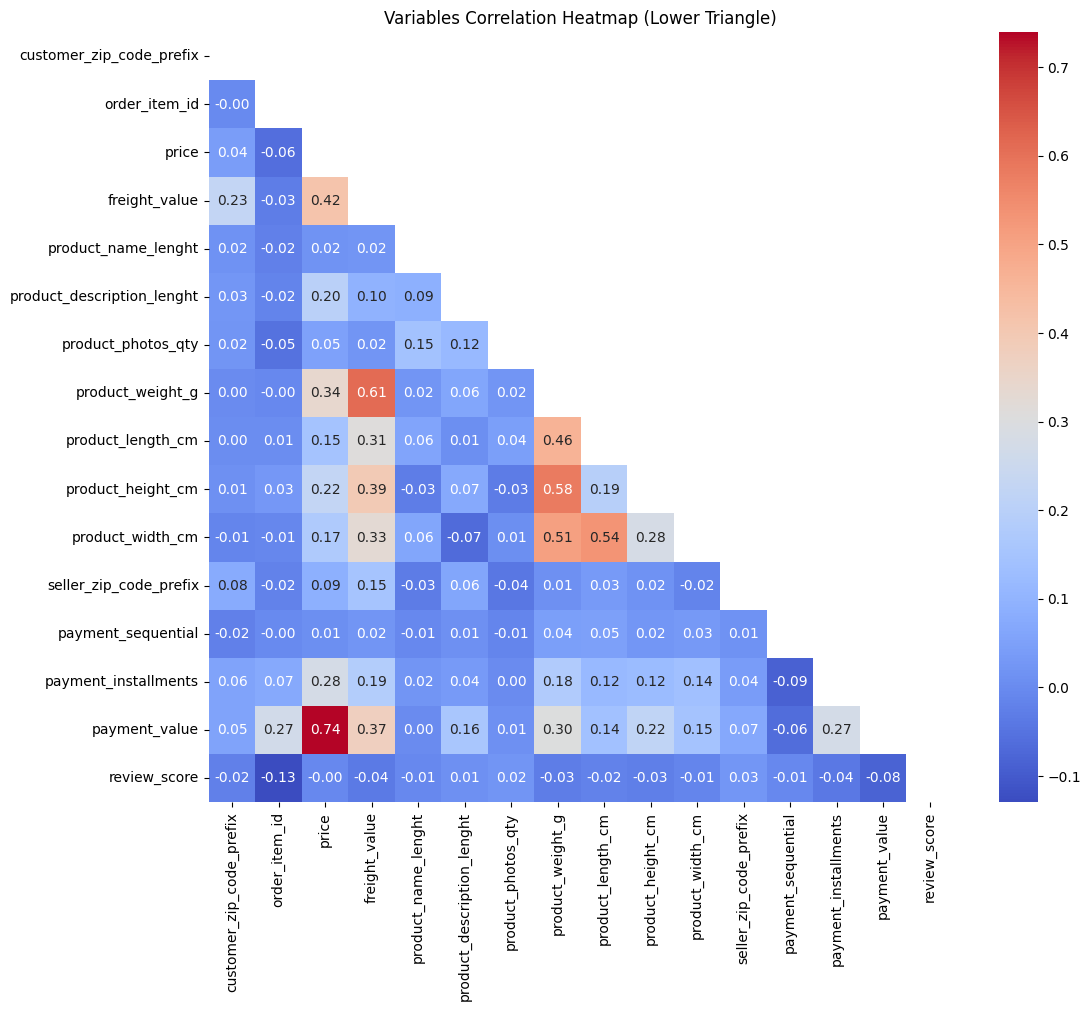

In [11]:
import matplotlib.font_manager as fm
plt.rc('font', family='Malgun Gothic')
mask = np.triu(np.ones_like(corr, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Variables Correlation Heatmap (Lower Triangle)')
plt.show()

In [12]:
drop_cols= [
    "결제 방식",            # payment_type
    "할부 개월 수",          # payment_installments
    "상품 ID",               # product_id
    "제품카테고리명",         # product_category_name
    "제품명 길이",           # product_name_lenght
    "제품 설명 길이",         # product_description_lenght
    "제품 사진 퀄리티",        # product_photos_qty
    "제품 무게",            # product_weight_g
    "제품 길이",            # product_length_cm
    "제품 높이",            # product_height_cm
    "제품 너비",            # product_width_cm
    "택배사 배송 시작일",       # order_delivered_carrier_date
    "제품 카테고리명 영어"      # product_category_name_english
]

In [13]:
df1_renamed.drop(drop_cols, axis=1)

,주문 ID,고객 ID,주문 상태,주문 시간,결제 승인 시각,고객 수령일 (실제 배송일),예상 배송일,고유 고객 ID,우편번호 앞자리,고객 도시,고객 주(State),주문 내 항목 순번,판매자 ID,배송 마감 기한,상품 가격,배송비,판매자 우편번호,판매자 도시,판매자 주,결제 순번,결제 금액,리뷰 ID,리뷰 점수,리뷰 제목,리뷰 내용,리뷰 작성일,리뷰 응답 시각
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,3.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350.0,maua,SP,2.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,31570.0,belo horizonte,SP,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,14840.0,guariba,SP,1.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119138,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1.0,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,17602.0,tupa,SP,1.0,195.00,29bb71b2760d0f876dfa178a76bc4734,4.0,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
119139,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1.0,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,8290.0,sao paulo,SP,1.0,271.01,371579771219f6db2d830d50805977bb,5.0,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
119140,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1.0,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,37175.0,ilicinea,MG,1.0,441.16,8ab6855b9fe9b812cd03a480a25058a1,2.0,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56
119141,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,2.0,a1043bafd471dff536d0c

In [14]:
df1_renamed.isnull().sum()

for col in df1_renamed.columns:
    nan_count = df1_renamed[col].isnull().sum()
    nan_ratio = nan_count / len(df2) * 100
    print(f'{col}: 결측치 {nan_count}개, 결측치 비율 {nan_ratio:.2f}%')

주문 ID: 결측치 0개, 결측치 비율 0.00%
고객 ID: 결측치 0개, 결측치 비율 0.00%
주문 상태: 결측치 0개, 결측치 비율 0.00%
주문 시간: 결측치 0개, 결측치 비율 0.00%
결제 승인 시각: 결측치 177개, 결측치 비율 0.15%
택배사 배송 시작일: 결측치 2086개, 결측치 비율 1.75%
고객 수령일 (실제 배송일): 결측치 3421개, 결측치 비율 2.87%
예상 배송일: 결측치 0개, 결측치 비율 0.00%
고유 고객 ID: 결측치 0개, 결측치 비율 0.00%
우편번호 앞자리: 결측치 0개, 결측치 비율 0.00%
고객 도시: 결측치 0개, 결측치 비율 0.00%
고객 주(State): 결측치 0개, 결측치 비율 0.00%
주문 내 항목 순번: 결측치 833개, 결측치 비율 0.70%
상품 ID: 결측치 833개, 결측치 비율 0.70%
판매자 ID: 결측치 833개, 결측치 비율 0.70%
배송 마감 기한: 결측치 833개, 결측치 비율 0.70%
상품 가격: 결측치 833개, 결측치 비율 0.70%
배송비: 결측치 833개, 결측치 비율 0.70%
제품카테고리명: 결측치 2542개, 결측치 비율 2.13%
제품명 길이: 결측치 2542개, 결측치 비율 2.13%
제품 설명 길이: 결측치 2542개, 결측치 비율 2.13%
제품 사진 퀄리티: 결측치 2542개, 결측치 비율 2.13%
제품 무게: 결측치 853개, 결측치 비율 0.72%
제품 길이: 결측치 853개, 결측치 비율 0.72%
제품 높이: 결측치 853개, 결측치 비율 0.72%
제품 너비: 결측치 853개, 결측치 비율 0.72%
판매자 우편번호: 결측치 833개, 결측치 비율 0.70%
판매자 도시: 결측치 833개, 결측치 비율 0.70%
판매자 주: 결측치 833개, 결측치 비율 0.70%
결제 순번: 결측치 3개, 결측치 비율 0.00%
결제 방식: 결측치 3개, 결측치 비율 0.00%
할부 개월 수: 결측치 3개, 결측치 비율 0.00%
결제 금

In [15]:
df1_renamed.notnull().sum()

,0
주문 ID,119143
고객 ID,119143
주문 상태,119143
주문 시간,119143
결제 승인 시각,118966
택배사 배송 시작일,117057
고객 수령일 (실제 배송일),115722
예상 배송일,119143
고유 고객 ID,119143
우편번호 앞자리,119143


In [16]:
#결측치
df1_renamed.columns

Index(['주문 ID', '고객 ID', '주문 상태', '주문 시간', '결제 승인 시각', '택배사 배송 시작일',
       '고객 수령일 (실제 배송일)', '예상 배송일', '고유 고객 ID', '우편번호 앞자리', '고객 도시',
       '고객 주(State)', '주문 내 항목 순번', '상품 ID', '판매자 ID', '배송 마감 기한', '상품 가격',
       '배송비', '제품카테고리명', '제품명 길이', '제품 설명 길이', '제품 사진 퀄리티', '제품 무게', '제품 길이',
       '제품 높이', '제품 너비', '판매자 우편번호', '판매자 도시', '판매자 주', '결제 순번', '결제 방식',
       '할부 개월 수', '결제 금액', '리뷰 ID', '리뷰 점수', '리뷰 제목', '리뷰 내용', '리뷰 작성일',
       '리뷰 응답 시각', '제품 카테고리명 영어'],
      dtype='object')

In [17]:
exclude_cols = ['리뷰 점수', '리뷰 제목', '리뷰 내용']

# 1. 제외 컬럼 외 결측치 있는 컬럼만 추출
df1_na = [col for col in df1_renamed.columns if col not in exclude_cols and df1_renamed[col].isnull().any()]

df_review_na = df1_renamed[df1_renamed['리뷰 점수'].isnull()]
df3 = df1_renamed.dropna(subset=df1_na)

# 필요 시 다시 붙이기
df_final = pd.concat([df3, df_review_na], ignore_index=True)

#리뷰 점수 결측치가 있는 행의 결측치들도 보존되기 때문에 다른 칼럼의 결측치 존재

In [18]:
df_final.isnull().sum()

,0
주문 ID,0
고객 ID,0
주문 상태,0
주문 시간,0
결제 승인 시각,5
택배사 배송 시작일,38
고객 수령일 (실제 배송일),136
예상 배송일,0
고유 고객 ID,0
우편번호 앞자리,0


In [19]:
#결측치 np.nan 대체는 결측치가 있는 위 상태와 동일하다는 지피티의 답변
df_final.fillna('없음')

,주문 ID,고객 ID,주문 상태,주문 시간,결제 승인 시각,택배사 배송 시작일,고객 수령일 (실제 배송일),예상 배송일,고유 고객 ID,우편번호 앞자리,고객 도시,고객 주(State),주문 내 항목 순번,상품 ID,판매자 ID,배송 마감 기한,상품 가격,배송비,제품카테고리명,제품명 길이,제품 설명 길이,제품 사진 퀄리티,제품 무게,제품 길이,제품 높이,제품 너비,판매자 우편번호,판매자 도시,판매자 주,결제 순번,결제 방식,할부 개월 수,결제 금액,리뷰 ID,리뷰 점수,리뷰 제목,리뷰 내용,리뷰 작성일,리뷰 응답 시각,제품 카테고리명 영어
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,없음,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,없음,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,없음,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,없음,없음,2018-08-18 00:00:00,2018-08-22 19:07:58,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114185,906a6b0a96d89ee226e4977e99b80b9e,274a720e69d300bc7696c8570f8978fe,delivered,2017-08-28 15:14:21,2017-08-28 15:25:29,2017-08-31 15:25:01,2017-09-05 19:47:44,2017-09-18 00:00:00,e2226f481eef03f2876d1a27f0f4b1b0,11030,santos,SP,1.0,8466762a9393a2b2b1de73f3cf6081a3,1dcfa3835714681d4ba4a93bc1e0fd41,2017-09-05 15:25:29,79.9,12.06,moveis_sala,29.0,104.0,2.0,2700.0,47.0,6.0,47.0,16200.0,birigui,SP,1.0,credit_card,1.0,91.96,없음,없음,없음,없음,없음,없음,furniture_living_room
114186,5333db16fe357175d39c82840dd3269d,7e008e5ec21e044fe30c34ec4e9d0747,delivered,2018-03-10 18:18:20,2018-03-13 04:08:22,2018-03-13 17:58:52,2018-04-03 15:32:52,2018-03-29 00:00:00,d06f106a141c540ca3b3cc0a3a8bba39,8141,sao paulo,SP,1.0,4deb009c36a910076a023947a7929201,4c61e37f664c3c88aff092aa

In [21]:
#중복값
df_final.duplicated().sum()

np.int64(0)

In [22]:
#한글 폰트 안 깨지는 코드
df3.to_csv('filename.csv', index=False, encoding='utf-8-sig')